# I_Na_K : Na+K+ Pump Current

## 1.0 Setup

In [42]:
# Import packages and constants
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'Python File')))

import os
import sys 
from constants import Na_i, K_i, Ca_i, Na_o, K_o, Ca_o, g_BNa, g_BCa, g_BK, R, T, F,E_K,E_CaL,E_Na,I_NaK_max,K_m_K
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Add here any state or other calculations that need to be performed before calculating the current

# Calculate sigma
sigma = (np.exp(Na_i / 67.3) - 1.0) / 7.0

# Calculate I_NaK
def i_Na_K_current(V, sigma, K_o, k_m_K,diabetes):
    I_NaK_max = 0.08  # nA, Maximum I_NaK current
    if diabetes:
     I_NaK_max = I_NaK_max*0.63
   
    term1 = 1.0 / (1.0 + 0.1245 * np.exp(0.1 * V * F / (R * T)) + 0.0365 * sigma * np.exp(V * F / (R * T)))
    term2 = K_o / (K_o + k_m_K)
    return I_NaK_max * term1 * term2

## 2.0 Solving

In [44]:
V_range = np.linspace(-60, 60, 100)

### 2.1 Healthy Cell


In [45]:
diabetes = False
# Initialising array to hold the current values 
I_Na_K_values = []

# Solve for different values of v and calculate I 
for V in V_range:
    I_Na_K=  i_Na_K_current(V, sigma, K_o, K_m_K,diabetes)
    I_Na_K_values.append(I_Na_K)

### 2.2 Diabetes

In [46]:
diabetes = True
# Initialising array to hold the current values 
I_Na_K_diabetic_values = []

# Solve for different values of v and calculate I 
for V in V_range:
    I_Na_K=  i_Na_K_current(V, sigma, K_o, K_m_K,diabetes)
    I_Na_K_diabetic_values.append(I_Na_K)

In [47]:
# Normalize the I_NaK values (assuming a capacity value for normalization)
C = 100e-6  # microfarads
normalised_healthy_i_NaK = np.array(I_Na_K_values) * 1e-3 / C
normalised_diabetic_i_NaK = np.array(I_Na_K_diabetic_values) * 1e-3 / C

## 3.0 Plotting

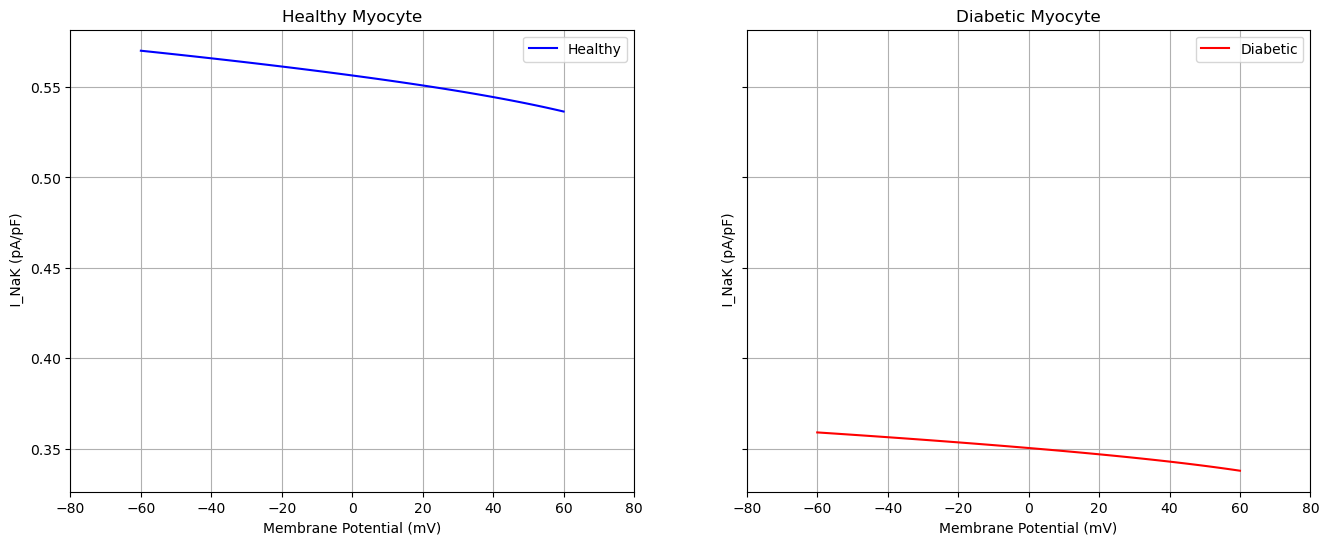

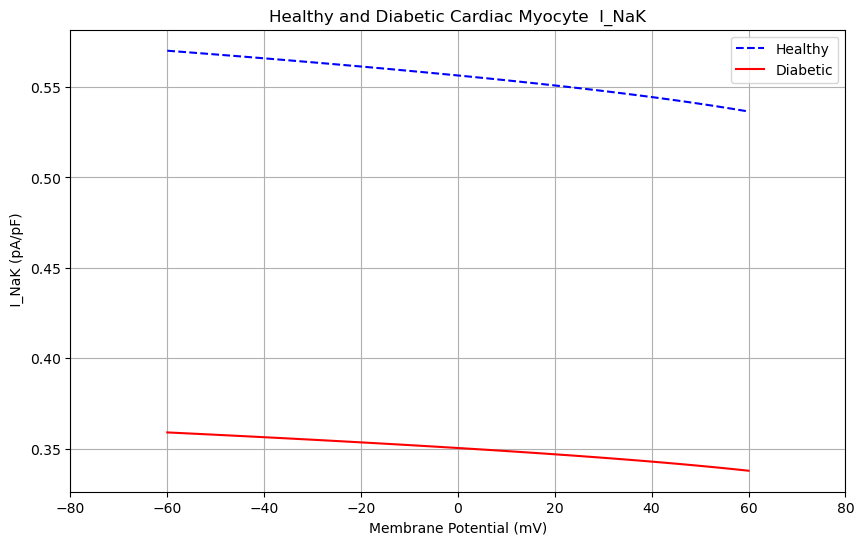

In [50]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot healthy I_NaK values
axs[0].plot(V_range, normalised_healthy_i_NaK, label='Healthy', color='blue')
axs[0].set_xlim(-80, 80)
axs[0].set_xlabel('Membrane Potential (mV)')
axs[0].set_ylabel(' I_NaK (pA/pF)')
axs[0].set_title('Healthy Myocyte')
axs[0].legend()
axs[0].grid(True)

# Plot diabetic I_NaK values
axs[1].plot(V_range, normalised_diabetic_i_NaK, label='Diabetic', color='red')
axs[1].set_xlim(-80, 80)
axs[1].set_xlabel('Membrane Potential (mV)')
axs[1].set_ylabel(' I_NaK (pA/pF)')
axs[1].set_title('Diabetic Myocyte')
axs[1].legend()
axs[1].grid(True)

# Overlay plot
plt.figure(figsize=(10, 6))
plt.plot(V_range, normalised_healthy_i_NaK, label='Healthy', color='blue', linestyle='--')
plt.plot(V_range, normalised_diabetic_i_NaK, label='Diabetic', color='red')
plt.xlim(-80, 80)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel(' I_NaK (pA/pF)')
plt.title('Healthy and Diabetic Cardiac Myocyte  I_NaK')
plt.legend()
plt.grid(True)
plt.show()